<a href="https://colab.research.google.com/github/am21s088/ML/blob/main/Logistic_Regression_Diabetes_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
diabetes = pd.read_csv("https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/diabetes.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##### Data Manipulation

    * Check for Missing Values

In [3]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
diabetes_df = diabetes.drop(['Pregnancies','Outcome'], axis = 1)
diabetes_df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33


In [6]:
# Replace 0 by nan value
diabetes_df.replace(0, np.nan, inplace = True)

In [7]:
diabetes_df.isnull().sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [8]:
np.round(diabetes_df['Insulin'].mean())

156.0

In [9]:
# Replace by central tendency (mean/median/mode)
diabetes_df['Insulin'].replace(np.nan, np.round(diabetes_df['Insulin'].mean()), inplace = True)

##### Impute method

In [10]:
from sklearn.impute import SimpleImputer
# strategy = 'mean','median','most_frequent'
imputer = SimpleImputer(strategy = 'median')

In [11]:
x_data = imputer.fit_transform(diabetes_df)
x_data

array([[148.   ,  72.   ,  35.   , ...,  33.6  ,   0.627,  50.   ],
       [ 85.   ,  66.   ,  29.   , ...,  26.6  ,   0.351,  31.   ],
       [183.   ,  64.   ,  29.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [121.   ,  72.   ,  23.   , ...,  26.2  ,   0.245,  30.   ],
       [126.   ,  60.   ,  29.   , ...,  30.1  ,   0.349,  47.   ],
       [ 93.   ,  70.   ,  31.   , ...,  30.4  ,   0.315,  23.   ]])

In [12]:
diabetes_df2 = pd.DataFrame(x_data, columns = diabetes_df.columns)
diabetes_df2.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148.0,72.0,35.0,156.0,33.6,0.627,50.0
1,85.0,66.0,29.0,156.0,26.6,0.351,31.0
2,183.0,64.0,29.0,156.0,23.3,0.672,32.0
3,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,137.0,40.0,35.0,168.0,43.1,2.288,33.0


In [13]:
diabetes_df2['Pregnancies'] = diabetes.Pregnancies
diabetes_df2['Outcome'] = diabetes.Outcome

In [14]:
diabetes_df2.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
0,148.0,72.0,35.0,156.0,33.6,0.627,50.0,6,1
1,85.0,66.0,29.0,156.0,26.6,0.351,31.0,1,0
2,183.0,64.0,29.0,156.0,23.3,0.672,32.0,8,1
3,89.0,66.0,23.0,94.0,28.1,0.167,21.0,1,0
4,137.0,40.0,35.0,168.0,43.1,2.288,33.0,0,1


<Axes: xlabel='Outcome', ylabel='count'>

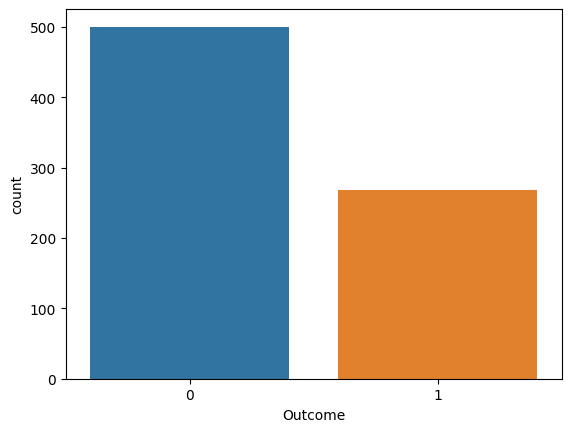

In [15]:
sns.countplot(x = 'Outcome', data = diabetes_df2)

##### Data Augmentation

    * To regenerate input data for training samples.

In [16]:
diabetes_df2['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

#### Handling Imbalanced Class

In [17]:
from sklearn.utils import resample
df_0 = diabetes_df2[diabetes_df2['Outcome'] == 0]
df_1 = diabetes_df2[diabetes_df2['Outcome'] == 1]

In [18]:
df_1_upsample = resample(df_1, n_samples = 500, replace = True, random_state = 123)

In [19]:
# SMOTE - Imbalanced Class, Class_weights
diabetes_df3 = pd.concat([df_0, df_1_upsample])

##### Correlation

<Axes: >

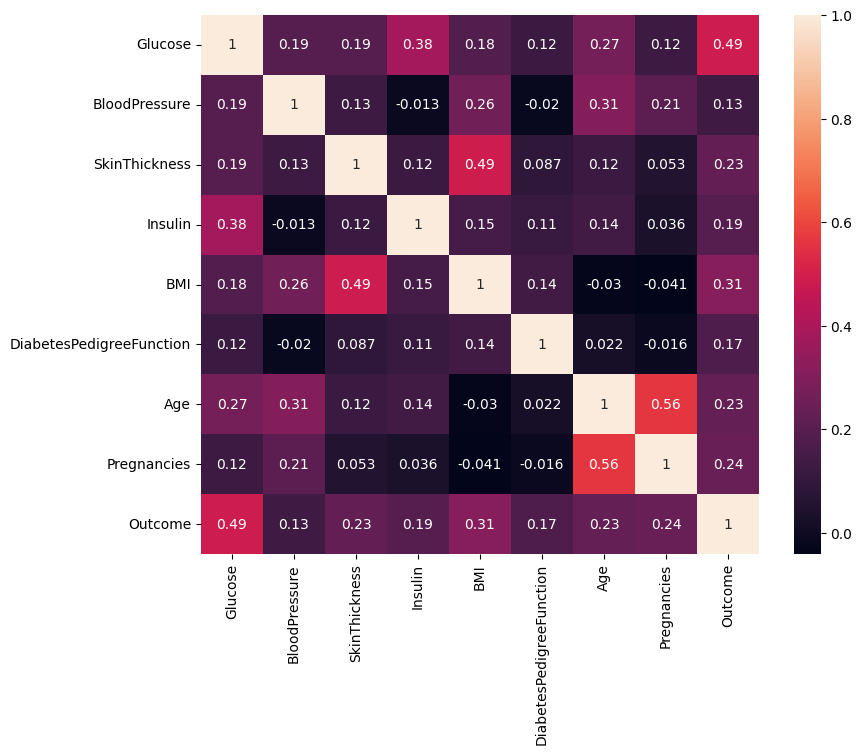

In [20]:
plt.figure(figsize = (9,7))
sns.heatmap(diabetes_df3.corr(), annot = True)

##### Features & Target

In [21]:
X = diabetes_df3.drop(['Outcome'], axis = 1)
Y = diabetes_df3['Outcome']

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

##### Logistic Regession

In [23]:
from sklearn.linear_model import LogisticRegression
# solver = optimizing algorithms, max_iter = 1e8, (like epochs higher the better), C = Inverse of Regularization, penalty = l1, l2 or elasticnet
logit_model = LogisticRegression(solver = 'liblinear', max_iter = 10000000, C = 10, penalty = 'l2')

In [24]:
logit_model.fit(x_train, y_train)

LogisticRegression(C=10, max_iter=10000000, solver='liblinear')

In [25]:
logit_model.score(x_test, y_test)

0.795

##### Classification Metrics

In [26]:
# predicted o/p
yhat = logit_model.predict(x_test)

In [27]:
print(yhat)

[1 1 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0
 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1 1 1 1 0 0 0 0
 0 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0
 1 1 1 1 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1
 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1
 1 0 0 0 1 1 1 0 0 1 0 0 1 1 0]


In [28]:
logit_model.predict_proba(x_test)

array([[0.44005952, 0.55994048],
       [0.13654984, 0.86345016],
       [0.68247924, 0.31752076],
       [0.84264868, 0.15735132],
       [0.80648365, 0.19351635],
       [0.47688441, 0.52311559],
       [0.89118771, 0.10881229],
       [0.47449418, 0.52550582],
       [0.87622226, 0.12377774],
       [0.78631049, 0.21368951],
       [0.97191675, 0.02808325],
       [0.50342019, 0.49657981],
       [0.05446062, 0.94553938],
       [0.79064588, 0.20935412],
       [0.32529956, 0.67470044],
       [0.27965133, 0.72034867],
       [0.50030869, 0.49969131],
       [0.36113461, 0.63886539],
       [0.17796731, 0.82203269],
       [0.50686149, 0.49313851],
       [0.06535079, 0.93464921],
       [0.45944472, 0.54055528],
       [0.41029449, 0.58970551],
       [0.14666194, 0.85333806],
       [0.40440947, 0.59559053],
       [0.9190478 , 0.0809522 ],
       [0.57659902, 0.42340098],
       [0.36540787, 0.63459213],
       [0.26035173, 0.73964827],
       [0.67229342, 0.32770658],
       [0.

In [29]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, yhat)

array([[79, 17],
       [24, 80]])

<Axes: >

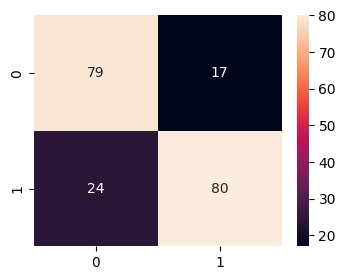

In [30]:
plt.figure(figsize = (4,3))
sns.heatmap(confusion_matrix(y_test, yhat), annot = True)

In [31]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.77      0.82      0.79        96
           1       0.82      0.77      0.80       104

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.79       200
weighted avg       0.80      0.80      0.80       200

